In [10]:
#data source -> https://www.kaggle.com/datasets/saramah/loan-data?resource=download

# credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

# purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

# int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

# installment: The monthly installments owed by the borrower if the loan is funded.

# log.annual.inc: The natural log of the self-reported annual income of the borrower.

# dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

# fico: The FICO credit score of the borrower.

# days.with.cr.line: The number of days the borrower has had a credit line.

# revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

# revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

# inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

# delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

# pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).


#### Exploratory Data Analysis for Loan Data.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('loan_data.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
data.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [11]:
data['purpose'].nunique()

7

In [13]:
purpose_unique = data['purpose'].unique()
purpose_unique

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [17]:
#getting value counts for each catrgory
purpose_value_counts = data['purpose'].value_counts()
purpose_value_counts

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

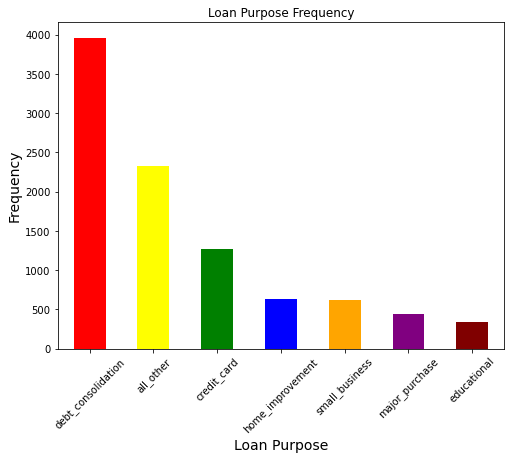

In [25]:
plt.figure(figsize=(8,6)) #adjusting figure size
purpose_value_counts.plot(kind='bar', color = ['red','yellow', 'green', 'blue','orange','purple','maroon'])
plt.title("Loan Purpose Frequency")
plt.xlabel('Loan Purpose', fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.xticks(rotation=45)
#plt.grid()
plt.show()

In [28]:
purpose_percent = (purpose_value_counts/len(data))*100
purpose_percent

debt_consolidation    41.313427
all_other             24.337022
credit_card           13.176028
home_improvement       6.567133
small_business         6.462727
major_purchase         4.562539
educational            3.581123
Name: purpose, dtype: float64

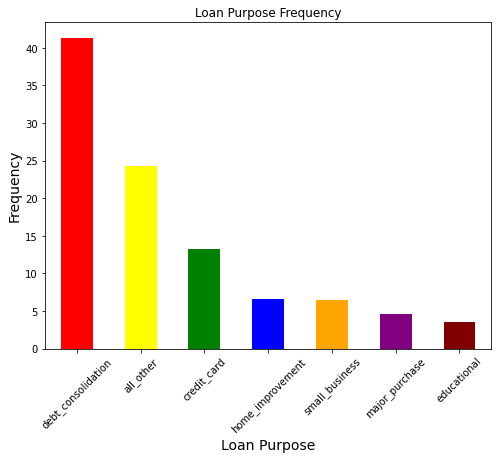

In [29]:
plt.figure(figsize=(8,6)) #adjusting figure size
purpose_percent.plot(kind='bar', color = ['red','yellow', 'green', 'blue','orange','purple','maroon'])
plt.title("Loan Purpose Frequency")
plt.xlabel('Loan Purpose', fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.xticks(rotation=45)
#plt.grid()
plt.show()

In [36]:
purpose_interest_rate = data.groupby('purpose')['int.rate'].describe()
purpose_interest_rate

,count,mean,std,min,25%,50%,75%,max
purpose,,,,,,,,
all_other,2331.0,0.116771,0.027152,0.0639,0.0932,0.1183,0.1355,0.2164
credit_card,1262.0,0.119738,0.024906,0.0600,0.1008,0.1189,0.1357,0.2086
debt_consolidation,3957.0,0.126595,0.024769,0.0600,0.1114,0.1280,0.1426,0.2121
educational,343.0,0.119907,0.026551,0.0600,0.0976,0.1218,0.1357,0.2011
home_improvement,629.0,0.117507,0.026889,0.0600,0.0945,0.1183,0.1348,0.2164
major_purchase,437.0,0.114171,0.027445,0.0705,0.0894,0.1158,0.1348,0.2017
small_business,619.0,0.138087,0.031191,0.0714,0.1146,0.1379,0.1600,0.2121


In [39]:
purp_int_clubbed_data = data[['purpose','int.rate']]
purp_int_clubbed_data

,purpose,int.rate
0,debt_consolidation,0.1189
1,credit_card,0.1071
2,debt_consolidation,0.1357
3,debt_consolidation,0.1008
4,credit_card,0.1426
...,...,...
9573,all_other,0.1461
9574,all_other,0.1253
9575,debt_consolidation,0.1071
9576,home_improvement,0.1600


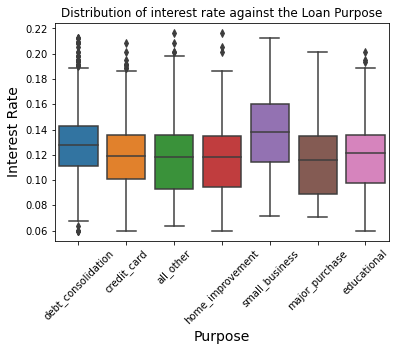

<Figure size 720x576 with 0 Axes>

In [43]:
import seaborn as sns
sns.boxplot(data=purp_int_clubbed_data, x='purpose',y='int.rate')
plt.title('Distribution of interest rate against the Loan Purpose')
plt.xlabel('Purpose',fontsize=14)
plt.ylabel('Interest Rate',fontsize=14)
plt.xticks(rotation=45)
plt.figure(figsize=(10,8))
#plt.legend()
plt.show()

In [50]:
# Trying to find extreme values or also called as outliers from data
import pandas as pd

# Assuming you have your DataFrame 'data' and the column you want to analyze is 'int.rate'
# Replace 'data' and 'int.rate' with your actual DataFrame and column name

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = data['int.rate'].quantile(0.25)
Q3 = data['int.rate'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to find outliers
outliers = data[(data['int.rate'] < lower_bound) | (data['int.rate'] > upper_bound)]

# Display the outliers
print("Outliers:")
print(outliers)


Outliers:
      credit.policy             purpose  int.rate  installment  \
2945              1         credit_card    0.2086       902.54   
3713              1      small_business    0.2011       623.40   
3991              1      small_business    0.2011       623.40   
4064              1      small_business    0.1979       287.20   
4731              1      small_business    0.2017       186.26   
4761              1      small_business    0.1982       229.86   
5093              1      small_business    0.1982       185.37   
5274              1         credit_card    0.2017       745.01   
5336              1  debt_consolidation    0.1982       556.10   
5363              1      small_business    0.2017       447.01   
5540              1  debt_consolidation    0.2086       827.33   
5679              1  debt_consolidation    0.2121       746.24   
5839              1      small_business    0.1982       556.10   
5868              1      small_business    0.2121       491.20   


In [52]:
# trying to find relation between income range and loan purpose

avg_inc_loan_purpose = data.groupby('purpose').agg({'log.annual.inc':['mean','max','min']})
avg_inc_loan_purpose


log.annual.inc                     
                             mean        max       min
purpose                                               
all_other               10.845313  13.997832  7.600902
credit_card             11.047230  13.142166  8.922658
debt_consolidation      10.912909  14.528354  7.547502
educational             10.549956  12.206073  8.101678
home_improvement        11.201979  13.487006  9.392662
major_purchase          10.844895  14.180154  8.699515
small_business          11.146216  13.331002  8.987197

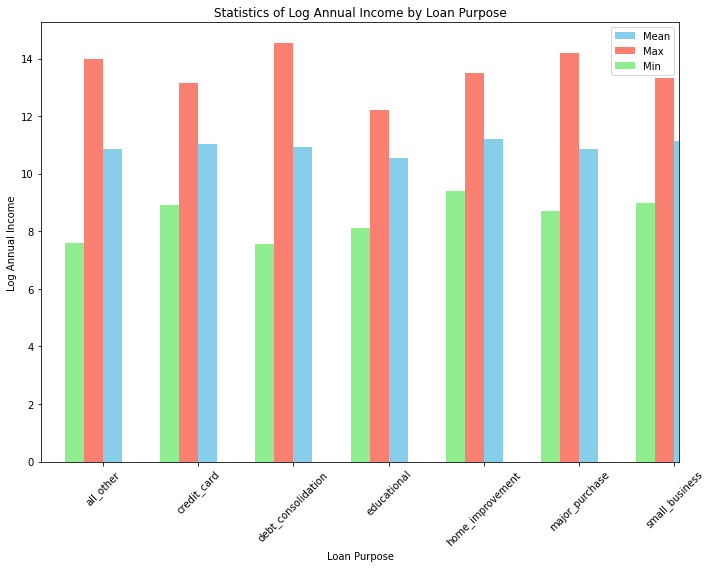

In [58]:


# Plotting mean, max, and min log annual income for each loan purpose
fig, ax = plt.subplots(figsize=(10, 8))

# Plot mean
avg_inc_loan_purpose['log.annual.inc']['mean'].plot(kind='bar', color='skyblue', position=0, width=0.2, ax=ax, label='Mean')
# Plot max
avg_inc_loan_purpose['log.annual.inc']['max'].plot(kind='bar', color='salmon', position=1, width=0.2, ax=ax, label='Max')
# Plot min
avg_inc_loan_purpose['log.annual.inc']['min'].plot(kind='bar', color='lightgreen', position=2, width=0.2, ax=ax, label='Min')

# Adding labels and title
plt.xlabel('Loan Purpose')
plt.ylabel('Log Annual Income')
plt.title('Statistics of Log Annual Income by Loan Purpose')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


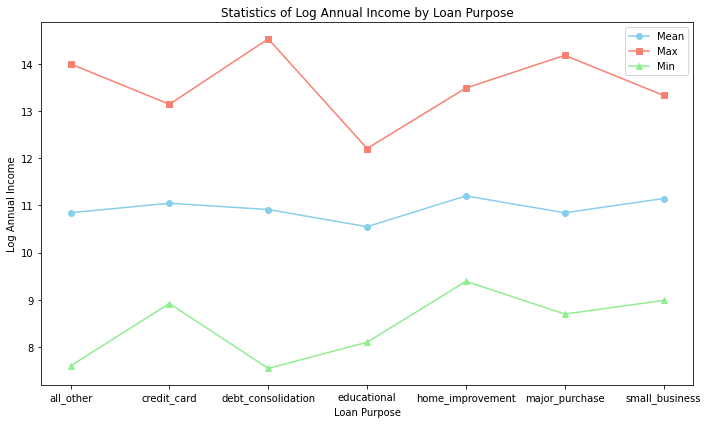

In [59]:


# Plotting mean, max, and min log annual income for each loan purpose
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting mean as a line
avg_inc_loan_purpose['log.annual.inc']['mean'].plot(kind='line', marker='o', color='skyblue', ax=ax, label='Mean')
# Plotting max as a line
avg_inc_loan_purpose['log.annual.inc']['max'].plot(kind='line', marker='s', color='salmon', ax=ax, label='Max')
# Plotting min as a line
avg_inc_loan_purpose['log.annual.inc']['min'].plot(kind='line', marker='^', color='lightgreen', ax=ax, label='Min')

# Adding labels and title
plt.xlabel('Loan Purpose')
plt.ylabel('Log Annual Income')
plt.title('Statistics of Log Annual Income by Loan Purpose')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [63]:
data['log.annual.inc'].describe()

count    9578.000000
mean       10.932117
std         0.614813
min         7.547502
25%        10.558414
50%        10.928884
75%        11.291293
max        14.528354
Name: log.annual.inc, dtype: float64

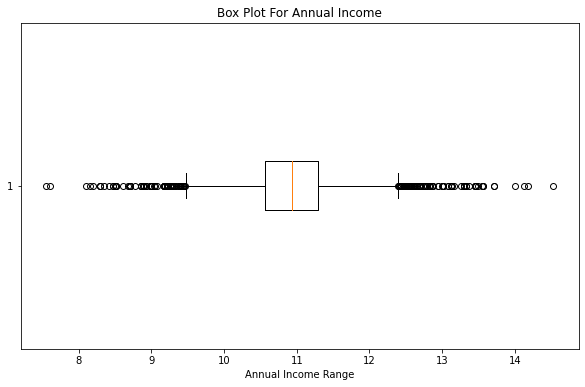

In [67]:
plt.figure(figsize=(10,6))
plt.boxplot(data['log.annual.inc'],vert=False)
plt.title("Box Plot For Annual Income")
plt.xlabel('Annual Income Range')
plt.show()

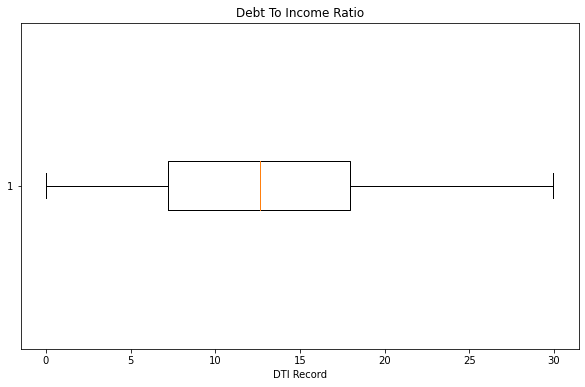

In [74]:
#plotting boxplot for dti record

plt.figure(figsize=(10,6))
plt.boxplot(data['dti'],vert=False)
plt.xlabel("DTI Record")
plt.title('Debt To Income Ratio')
plt.show()

In [71]:
# Loan purpose and DTI record analysis

purpose_dti = data.groupby('purpose')['dti'].agg(['min','max','mean'])
purpose_dti

,min,max,mean
purpose,,,
all_other,0.0,29.90,11.079498
credit_card,0.0,29.95,14.099398
debt_consolidation,0.0,29.96,14.076462
educational,0.0,29.74,11.344927
home_improvement,0.0,28.17,10.197504
major_purchase,0.0,26.15,10.159886
small_business,0.0,29.21,10.793296


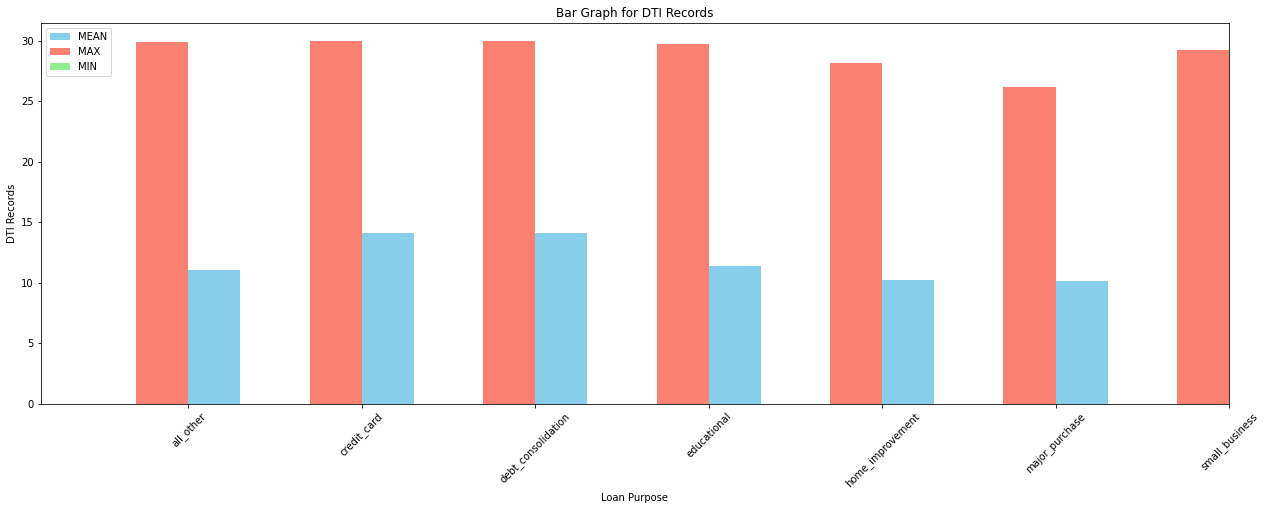

In [88]:
fig = plt.figure(figsize=(12,7))
purpose_dti['mean'].plot(kind='bar', color = 'skyblue', position=0, width=0.3, label='MEAN')
purpose_dti['max'].plot(kind='bar', color = 'salmon', position=1, width=0.3, label='MAX')
purpose_dti['min'].plot(kind='bar', color = 'lightgreen', position=2, width=0.3, label='MIN')
            
plt.title('Bar Graph for DTI Records')
plt.xlabel('Loan Purpose')
plt.ylabel('DTI Records')
plt.xticks(rotation=45)
plt.legend()
plt.subplots_adjust(right=1.5)
plt.show()

In [91]:
# FICO score analysis

excellent = 0
very_good = 0
good = 0
fair = 0
poor = 0

for score in data['fico']:
    if score >= 800 and score <= 850:
        excellent+=1
    elif score >= 740 and score <= 799:
        very_good+=1
    elif score >= 670 and score <= 739:
        good+=1
    elif score >= 580 and score <= 669:
        fair+=1
    else:
        poor+=1
        
print('excellent : ',excellent,'\nvery_good : ',very_good,'\ngood : ',good,'\nfair : ',fair,'\npoor : ',poor)

excellent :  145 
very_good :  2085 
good :  6007 
fair :  1341 
poor :  0


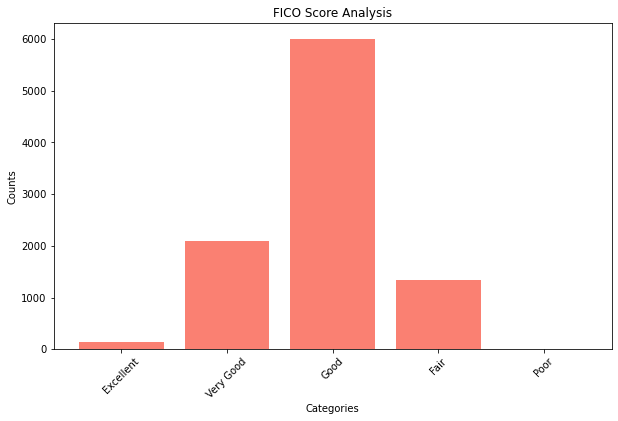

In [94]:
categories = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']
counts = [excellent, very_good, good, fair, poor]

plt.figure(figsize=(10,6))
plt.bar(categories,counts, color = 'salmon')
plt.title('FICO Score Analysis')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

In [99]:
for purpose, group_data in data.groupby('purpose'):
    print(purpose," & ",group_data.head(10))

all_other  &      credit.policy    purpose  int.rate  installment  log.annual.inc    dti  \
7               1  all_other    0.1114       131.22       11.002100  11.08   
16              1  all_other    0.1317        77.69       10.522773   2.26   
20              1  all_other    0.0800       188.02       11.225243  16.08   
21              1  all_other    0.0863       474.42       10.819778   2.59   
25              1  all_other    0.0901       159.03       12.429216  10.00   
26              1  all_other    0.0743       155.38       11.082143   0.28   
28              1  all_other    0.0743       155.38       12.206073   0.28   
29              1  all_other    0.0743       155.38       12.206073   3.72   
35              1  all_other    0.0743       155.38       11.461632   3.83   
47              1  all_other    0.0838       160.72       10.373491  14.78   

    fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
7    722        5116.000000      24220        68.6       

In [102]:
for i in data.groupby('purpose'):
    print(i[0])

all_other
credit_card
debt_consolidation
educational
home_improvement
major_purchase
small_business


In [130]:
fico_ranges = {
    'Excellent': (800, 850),
    'Very Good': (740, 799),
    'Good': (670, 739),
    'Fair': (580, 669),
    'Poor': (300, 579)
}


purpose_fico_counts = {}


for purpose, grp_data in data.groupby('purpose'):
    
    purpose_fico_counts[purpose] = {category: 0 for category in fico_ranges}
    
    
    for category, (lower_value, higher_value) in fico_ranges.items():
        
        dt = (grp_data['fico'] >= lower_value) & (grp_data['fico'] <= higher_value)
        
        
        count_within_range = dt.sum()
        
        
        purpose_fico_counts[purpose][category] = count_within_range

print("Purpose-wise FICO score counts:")
for purpose, counts in purpose_fico_counts.items():
    print(f"\nPurpose: {purpose.upper()}\n")
    for category, count in counts.items():
        print(f"{category}: {count}")
    print()


Purpose-wise FICO score counts:

Purpose: ALL_OTHER

Excellent: 56
Very Good: 589
Good: 1384
Fair: 302
Poor: 0


Purpose: CREDIT_CARD

Excellent: 8
Very Good: 262
Good: 821
Fair: 171
Poor: 0


Purpose: DEBT_CONSOLIDATION

Excellent: 24
Very Good: 625
Good: 2665
Fair: 643
Poor: 0


Purpose: EDUCATIONAL

Excellent: 2
Very Good: 70
Good: 213
Fair: 58
Poor: 0


Purpose: HOME_IMPROVEMENT

Excellent: 25
Very Good: 218
Good: 317
Fair: 69
Poor: 0


Purpose: MAJOR_PURCHASE

Excellent: 17
Very Good: 143
Good: 237
Fair: 40
Poor: 0


Purpose: SMALL_BUSINESS

Excellent: 13
Very Good: 178
Good: 370
Fair: 58
Poor: 0



In [164]:
print('Number of people have bad public record on the basis of loan purpose :- \n')

grp_data_purpose_pub_rec = data.groupby('purpose')['pub.rec'].sum()
print(grp_data_purpose_pub_rec)

Number of people have bad public record on the basis of loan purpose :- 

purpose
all_other             112
credit_card            91
debt_consolidation    279
educational            15
home_improvement       42
major_purchase         21
small_business         35
Name: pub.rec, dtype: int64


In [165]:
print("Same record in terms of percentage :- \n")
print((grp_data_purpose_pub_rec/data.shape[0])*100)

Same record in terms of percentage :- 

purpose
all_other             1.169346
credit_card           0.950094
debt_consolidation    2.912925
educational           0.156609
home_improvement      0.438505
major_purchase        0.219252
small_business        0.365421
Name: pub.rec, dtype: float64


In [151]:
grp_data_purpose_pub_rec.sum()

595

In [142]:
data['inq.last.6mths'].head()

0    0
1    0
2    1
3    1
4    0
Name: inq.last.6mths, dtype: int64

In [143]:
data['delinq.2yrs'].head()

0    0
1    0
2    0
3    0
4    1
Name: delinq.2yrs, dtype: int64

In [149]:
delayed_loan_and_inq = data[(data['inq.last.6mths']>0) & (data['delinq.2yrs']>0)]

print("Number of borrowers whose inquiry made and they also delayed installments in past : ",delayed_loan_and_inq.shape)

print("In percentage : ", (delayed_loan_and_inq.shape[0]/data.shape[0])*100)

Number of borrowers whose inquiry made and they also delayed installments in past :  (723, 14)
In percentage :  7.548548757569431


In [156]:
print("Number of people whose inquiry made :- ")
nums = data['inq.last.6mths'].apply(lambda x : x==1).sum()
nums

Number of people whose inquiry made :- 


2462

In [157]:
print("Number of people who delayed their installment :-")
nums2 = data['delinq.2yrs'].apply(lambda x : x==1).sum()
nums2

Number of people who delayed their installment :-


832

In [168]:
print("Number of borrowers who satify credit policy criteria, yet they have bad public records :- ")

crdt_plcy_bad_publ_rec = data[(data['credit.policy']>0) & (data['pub.rec']>0)]
crdt_plcy_bad_publ_rec.shape[0]

Number of borrowers who satify credit policy criteria, yet they have bad public records :- 


407